In [1]:
#Import all the required librairies and modules we will be using for sentiment analysis

#'pandas' module handles a diverse range of functions such as converting a dataframe to a matrix array,
#and parsing different file formats
import pandas as pd 

# We use 'numpy', to compute arrays and matrices efficiently as well as supply a large library of high-level mathematical 
#functions that these arrays and matrices function on
import numpy as np 

#'sklearn.metrics' package measures the performance of classification algorithms, 'classification_report' measures the 
#classification quality of an algorithm, 'confusion_matrix' evaluates the classification accuracy
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#Importing the dataset
def importdatasets(inputcsv):
    #list to store the content of each review
    Review =[]
    #list to store the rating of each review 
    Rating = []
    #list to store the Application IDs
    App_ID =[]
    #open the file path in read mode 'r' and assign it to a variable 'file'
    file = open(file = inputcsv, mode = 'r')
    #read contents of the file and assign it to variable 'lines'
    lines= file.readlines()
    #pass a 'for' loop to iterate through each line in the file and perform the next set of operations
    for line in lines:
        #split each column of the tab separated file using 'line.split' method and assign it to 'linesplit'
        linesplit = line.split('\t')
        #first column of the dataset corresponds to the rating
        Rating.append(linesplit[0])
        #Second column corresponds to the App ID
        App_ID.append(linesplit[1])
        #Third column of the dataset corresponds to the review
        Review.append(linesplit[2])
        #return rating, APP_ID and reviews
    return Review, App_ID, Rating

#Import the file path of the training dataset by calling the function definition 'importdatasets' and assign them to 
#'Train_reviews', 'Train_ID', 'Train_ratings'
Train_reviews, Train_ID, Train_ratings = importdatasets(r"C:\Users\vinit\Desktop\EHU\Semester 2\Applications in Big Data\Task 10 and CW 2\Train dataset.csv")
#Import the file path of the testing dataset by calling the function definition 'importdatasets' and assign them to 
#'Test_reviews', 'Test_ID', 'Test_ratings'
Test_reviews, Test_ID, Test_ratings = importdatasets(r"C:\Users\vinit\Desktop\EHU\Semester 2\Applications in Big Data\Task 10 and CW 2\Test dataset.csv")

In [3]:
#Use pandas as 'pd' to convert the training dataset into a dataframe 'readfile'. Argument 'header = None' says the columns 
#do not have header names
readfile = pd.read_csv(r"C:\Users\vinit\Desktop\EHU\Semester 2\Applications in Big Data\Task 10 and CW 2\Training dataset.csv",
                      header = None)
#Add column names to the dataframe
readfile.columns = ["Rating", "APP ID", "Review"]

#Display the file contents
readfile

,Rating,APP ID,Review
0,2,B004A9SDD8,"Loves the song, so he really couldn't wait to ..."
1,3,B004A9SDD8,"Oh, how my little grandson loves this app. He'..."
2,3,B004A9SDD8,I found this at a perfect time since my daught...
3,3,B004A9SDD8,My 1 year old goes back to this game over and ...
4,3,B004A9SDD8,There are three different versions of the song...
...,...,...,...
19996,3,B004K4RY9M,This particular word search is challenging bec...
19997,1,B004K4RY9M,Hard to use. My finger wouldn't pick up the w...
19998,3,B004K4RY9M,"Keeps my mind sharp, good for eye hand coordin..."
19999,3,B004K4RY9M,This is really a fun one - great on my Kindle ...


In [4]:
# We define a 'sentimentscore' function that returns the sentiment value of the review depending on the 'Rating' column
def sentimentscore(x):
    #The sentiment value is negative if the rating is '1'
    if x['Rating'] == 1:
        value = "Negative"
    #The sentiment value is neutral if the rating is '2'
    elif x['Rating'] == 2:
        value = "Neutral"
    #The sentiment value is positive if the rating is '3'
    elif x["Rating"] == 3:
        value = "Positive"
    #If non of the above 'if' conditions hold true, assign 'value' as '-1'
    else:
        value = -1
    #return the sentiment value
    return value

In [5]:
#first create a copy of the file and assign it to "reviewcopy"
reviewcopy=readfile.copy()

#Check for any null values 
reviewcopy.isnull().sum()

Rating    0
APP ID    0
Review    0
dtype: int64

In [6]:
#Add a column 'Sentiment Value' to the dataframe based on the function definition operation 'sentimentscore'
reviewcopy['Sentiment Value'] = reviewcopy.apply(sentimentscore, axis=1)
#print the dataframe
reviewcopy

,Rating,APP ID,Review,Sentiment Value
0,2,B004A9SDD8,"Loves the song, so he really couldn't wait to ...",Neutral
1,3,B004A9SDD8,"Oh, how my little grandson loves this app. He'...",Positive
2,3,B004A9SDD8,I found this at a perfect time since my daught...,Positive
3,3,B004A9SDD8,My 1 year old goes back to this game over and ...,Positive
4,3,B004A9SDD8,There are three different versions of the song...,Positive
...,...,...,...,...
19996,3,B004K4RY9M,This particular word search is challenging bec...,Positive
19997,1,B004K4RY9M,Hard to use. My finger wouldn't pick up the w...,Negative
19998,3,B004K4RY9M,"Keeps my mind sharp, good for eye hand coordin...",Positive
19999,3,B004K4RY9M,This is really a fun one - great on my Kindle ...,Positive


DATA PRE-PROCESSING/ DATA CLEANING:

In [7]:
#Import the libraries required for data pre-processing
#importing the "regular expression" library which will be used to replace any special character or string variables.
import re
#importing the nltk library to work with NLP in python. It helps in word tokenization, parse-tree visualization etc.
import nltk 
#downloading all stopwords from the nltk library
nltk.download ('stopwords') 
#extract the downloaded stopwords from the nltk corpus
from nltk.corpus import stopwords  
#this module is used to reduce word inflections and mapping words with similar meaning to the root word
from nltk.stem.porter import PorterStemmer 
#Assign a PorterStemmer as a function to the variable 'PS'
PS = PorterStemmer()
#importing all the stopwords in the English language
allstopwords = stopwords.words('English')
#removing the word 'not' from the list of stopwords, as it can denote a negative review
allstopwords.remove('not') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#create a variable named "new_review" to assign the list of reviews after data cleaning
new_review = []

for item in range (0,20001):
    #for each word in the "Review" column, replace all special characters except lowercase and uppercase letters of 'A-Z' with a
    #blank space
    review = re.sub("[^a-zA-Z]"," ", reviewcopy['Review'][item])
    #convert all words in the "Review" column to lower case
    review = review.lower()
    #split all reviews into a list 
    review = review.split()
    #dropping all stopwords and stemming the leftover words
    review = [PS.stem(word) for word in review if not word in set(allstopwords)]
    review = ' '.join(review)
    #join the cleaned review with "new_review" list
    new_review.append(review)

In [9]:
#print the cleaned review 'new_review' to see the cleaned data
new_review

['love song realli wait play littl less interest play long almost like play older game realli cute younger child',
 'oh littl grandson love app alway ask monkey grandma tire long find item page touch activ endlessli entertain least well worth',
 'found perfect time sinc daughter favorit song moment five littl monkey easi littl one oper fun thing play differ gener nice give littl varieti worth money highli recommend',
 'year old goe back game simpl easi toddler use even caught year old play well good app littl guy',
 'three differ version song game keep occupi everyth click someth airplan fli around room telephon ring play messag lamp turn light see monkey eye go dark dog bark click window chase cat bed everi third time pictur wall becom interact portrait traffic light stop start monkey jump alarm clock ring plant grow produc banana ball bounc toy truck rumbl honk lot keep toddler occupi oh monkey jump fall bed mama call doctor etc great',
 'cute great app littl one mo old love think fu

In [10]:
#Add the cleaned data to the 'Review' column of the dataframe 'reviewcopy'
reviewcopy['Review']=new_review
#print the dataframe
reviewcopy

,Rating,APP ID,Review,Sentiment Value
0,2,B004A9SDD8,love song realli wait play littl less interest...,Neutral
1,3,B004A9SDD8,oh littl grandson love app alway ask monkey gr...,Positive
2,3,B004A9SDD8,found perfect time sinc daughter favorit song ...,Positive
3,3,B004A9SDD8,year old goe back game simpl easi toddler use ...,Positive
4,3,B004A9SDD8,three differ version song game keep occupi eve...,Positive
...,...,...,...,...
19996,3,B004K4RY9M,particular word search challeng one time find ...,Positive
19997,1,B004K4RY9M,hard use finger pick word right frustrat tri u...,Negative
19998,3,B004K4RY9M,keep mind sharp good eye hand coordin challeng...,Positive
19999,3,B004K4RY9M,realli fun one great kindl fire airplan would ...,Positive


In [12]:
#The 'CountVectorizer' module converts a text document collection to a text-token count matrix.
from sklearn.feature_extraction.text import CountVectorizer
#Implement the Decision Tree Algorithm by importing 'tree' from sklearn. Decision Trees are a supervised and non-parametric
#technique used for classification models
from sklearn import tree
#create an object "trainingCV" that uses CountVectorizer to convert the reviews into Bag-Of-Words feature
trainingCV = CountVectorizer(max_features = 10000)
#converting the pre-processed reviews into Bag-Of-Words features, 'trainingBOW'
trainingBOW = trainingCV.fit_transform(new_review)
#getting the features for a list of the reviews as "Bag-Of-Words" and assigning it to 'trainingwords'
trainingwords = trainingCV.get_feature_names()
#Using the same token vectors obtained in the training reviews and implementing them on the test dataset. Assign the variable as
#'testingCV'
testingCV = CountVectorizer(vocabulary = trainingwords)
#converting the test reviews into a 'Bag-Of-Words' features and naming them as 'testingBOW'
testingBOW = testingCV.fit_transform(Test_reviews)

C:\Users\vinit\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
#We import 'GridSearchCV' module to implement a “fit” and “score” method. It helps in looping through predefined hyperparameters 
#and fits our classification model on the training dataset
from sklearn.model_selection import GridSearchCV
#'cross_val_score' module evaluates the classification model and returns a score list for each fold of cross 
# validation configuration
from sklearn.model_selection import cross_val_score
#Import the Decision Tree Classifier module to implement the algorithm
from sklearn.tree import DecisionTreeClassifier
#Import the K-Nearest Neighbour Classifier module to implement KNN classification
from sklearn.neighbors import KNeighborsClassifier as KNC
#Import the Support Vector Machine module to implement SVM classification
from sklearn.svm import SVC
#Import the Random Forest Classifier module to implement Random Forest classification
from sklearn.ensemble import RandomForestClassifier
#Call each classification model function and assign them to variables 'DecisionTree_cvs', 'KNN_cvs', 'SVM_cvs' and 'RFC_cvs' 
#respectively
DecisionTree_cvs=DecisionTreeClassifier()
KNN_cvs=KNC()
SVM_cvs=SVC()
RFC_cvs=RandomForestClassifier()
#Create a dictionary and assign each classification model implemented above as key, value pairs
cvs_dict = {0: 'Decision Tree', 1:'KNN', 2: 'SVM', 3: 'Random Forest'}
#Assign the list of classification models performed to a variable 'classification_models'
classification_models=[DecisionTree_cvs,KNN_cvs,SVM_cvs,RFC_cvs]

#Using a for loop, for each key, value (idx,model) pair in the dictionary, iterate through the classification models applied on
#'trainingBOW' and variable 'y' assigned as 'reviewcopy['Rating']' earlier. Obtain the mean test accuracy for each 
#classification algorithm
for idx,model in enumerate(classification_models):
    print("{} Test Accuracy: {}".format(cvs_dict[idx],cross_val_score(model, testingBOW, Test_ratings, cv=10, scoring ='accuracy').mean()))

Decision Tree Test Accuracy: 0.6778339169584793
KNN Test Accuracy: 0.7066851425712857
SVM Test Accuracy: 0.7639379189594797
Random Forest Test Accuracy: 0.7518372936468234


As we can see, the Support Vector Machine (SVM) and Random Forest Classifier models provide us better average accuracies than the Decision Tree (DT) and KNN algorithms. Now, we get the predictions for the test data and obtain the precision, recall and f1-score measures for each algorithm.

1) DECISION TREE (DT) MODEL:

In [14]:
#call the DT classifier function and assign it to a variable 'classifier'
classifier = tree.DecisionTreeClassifier()
#fit the training 'Bag-Of-Words' feature and 'Train_ratings' on to the DT classifier
classifier.fit(trainingBOW, Train_ratings)
#implement the DT classifier onto the Testing 'Bag-of-Words' instances and assign it to variable 'predicted_labels'
predicted_labels = classifier.predict(testingBOW)
#print the classification report
print(classification_report(Test_ratings,predicted_labels))

              precision    recall  f1-score   support

           1       0.36      0.36      0.36      3469
           2       0.22      0.17      0.19      2087
           3       0.80      0.83      0.81     14443

    accuracy                           0.68     19999
   macro avg       0.46      0.45      0.45     19999
weighted avg       0.66      0.68      0.67     19999



2) K-NEAREST NEIGHBOUR (KNN) CLASSIFIER MODEL:
Here, we obtain the results for 'k' value, i.e., 'n_neighbours' as 141. The predictions for different 'k' values as 50, 100, 250, 500 and 5000 have been tested and displayed at the end of the code, for reference.

In [33]:
#Use the KNC module imported to implement the KNN model and apply n_neighbors as 141. Assign the classification model to a 
# variable 'classifier2'
classifier2 = KNC(n_neighbors = 141)
#fit the training 'Bag-Of-Words' feature and 'Train_ratings' on to the KNN classifier
classifier2.fit(trainingBOW, Train_ratings)
#implement the KNN classifier onto the Testing 'Bag-of-Words' instances and assign it to variable 'predicted_labels2'
predicted_labels2 = classifier2.predict(testingBOW)
#print the classification report
print(classification_report(Test_ratings,predicted_labels2))

              precision    recall  f1-score   support

           1       0.50      0.06      0.10      3469
           2       0.00      0.00      0.00      2087
           3       0.73      0.99      0.84     14443

    accuracy                           0.73     19999
   macro avg       0.41      0.35      0.32     19999
weighted avg       0.61      0.73      0.63     19999



3) SUPPORT VECTOR MACHINE (SVM) MODEL:

In [47]:
#Use the SVC module imported to implement the SVM model and assign the kernel as 'linear'. Assign the classification model to a 
#variable 'classifier3'
classifier3 = SVC(kernel = 'linear')
#fit the training 'Bag-Of-Words' feature and 'Train_ratings' on to the SVM classifier
classifier3.fit(trainingBOW,Train_ratings)
#implement the KNN classifier onto the Testing 'Bag-of-Words' instances and assign it to variable 'predictions'
predictions=classifier3.predict(testingBOW)
#print the classification report
print(classification_report(Test_ratings,predictions))

              precision    recall  f1-score   support

           1       0.54      0.26      0.35      3469
           2       0.26      0.22      0.24      2087
           3       0.79      0.90      0.84     14443

    accuracy                           0.72     19999
   macro avg       0.53      0.46      0.48     19999
weighted avg       0.69      0.72      0.69     19999



4) RANDOM FOREST CLASSIFIER MODEL:
Here, we obtain the results for 'n_estimators' as 257. Predictions for different values of 'n_estimators' as 40, 67, 171 and 5000 are obtained at the end of the code, for reference.

In [36]:
#Use the 'RandomForestClassifier' module imported earlier to implement the algorithm and select the 'n_estimators' value as 257. 
#Assign the classification model to a variable 'classifier4'
classifier4 = RandomForestClassifier(n_estimators = 257)
#fit the training 'Bag-Of-Words' feature and 'Train_ratings' on to the Random Forest classifier
classifier4.fit(trainingBOW,Train_ratings)
#implement the Random Forest classifier classifier onto the Testing 'Bag-of-Words' instances and assign it to variable 
#'newpredictions'
newpredictions = classifier4.predict(testingBOW)
#print the classification report
print(classification_report(Test_ratings,newpredictions))

              precision    recall  f1-score   support

           1       0.62      0.19      0.29      3469
           2       0.47      0.07      0.12      2087
           3       0.76      0.98      0.85     14443

    accuracy                           0.75     19999
   macro avg       0.62      0.41      0.42     19999
weighted avg       0.70      0.75      0.68     19999



Using the prediction results of the Random Forest Classifier to display the confusion matrix:

In [44]:
#Import the pyplot module from the matplotlib package to plot required figures
import matplotlib.pyplot as plt 
#  Define a function that plots the confusion matrix. Normalization can be applied by setting 'normalize=True'.    
def conf_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    #plot the confusion matrix using the 'imshow' attribute
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #Insert a title for the plot
    plt.title(title)
    #Add a colour bar to the confusion matrix plot using a colour scale
    plt.colorbar()
    #Arrange the coordinate labels with evenly spaced values within the length of the classes taken as interval
    ticks = np.arange(len(classes))
    #Set the labels on the x-axis to be visible and rotate them by 45 degrees
    plt.xticks(ticks, classes, rotation=45)
    #Set the labels on the y-axis
    plt.yticks(ticks, classes)
    
    #If we want to normalize the confusion matrix, we follow this step
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        #else, we display a confusion matrix, without normalization 
        print("Regular Confusion matrix")
    #setting a threshold value
    threshold_value = cm.max() / 2.
    #for each element in the row and column of the confusion matrix, plot the text for every cell in the predicted vs actual 
    #class
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold_value else "black")
    #control the extra padding around the overall plot using 'tight_layout' attribute
    plt.tight_layout()
    #Label the x-axis as 'Predicted label'
    plt.xlabel('Predicted class')
    #Label the y-axis as 'True label'
    plt.ylabel('Actual class')

Regular Confusion matrix


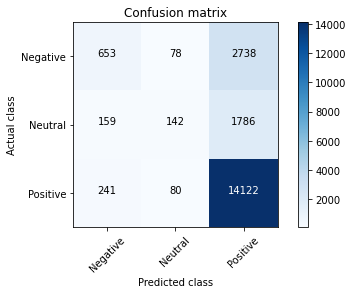

In [45]:
#Import the metrics module from sklearn library to measure the performance of the confusion matirx
from sklearn import metrics
#Use the 'confusion_matrix' attribute to apply the performance metrics on the testing dataset and the predictions obtained by
#the Random Forest Classifier (i.e, 'newpredictions')
cm = metrics.confusion_matrix(Test_ratings, newpredictions)
#Plot the confusion matrix by calling the function definition 'conf_matrix_plot'
conf_matrix_plot(cm, classes=['Negative','Neutral','Positive'])

Going by the above predictions obtained for various classifier models, we prefer the the Random Forest Classifier model as it performs more efficiently than the rest of the models. Although the average accuracy score for the SVM model was higher than that of the Random Forest model, looking at the precision values for both models and for a multiclass problem such as ours, we prefer the Random Forest classifier over SVM.
In addition to this, SVM takes a longer performance time to predict results than the Random Forest classifier model. 
Using the predictions of the Random Forest model, we decide which AAD company is most likely to achieve profitable returns based on the reviews of the applications they own.

In [17]:
#define a dictionary 'Companies' with companies 'AAD_1', 'AAD_2' and 'AAD_3' along with their android application ID codes, 
#as key,value pairs
Companies = {'AAD_1':['B004NWLM8K','B004Q1NH4U','B004LPBTAA'],
            'AAD_2' :['B004S6NAOU','B004R6HTWU','B004N8KDNY'],
            'AAD_3':['B004KA0RBS','B004NPELDA','B004L26XXQ']}

#Initialize the count values for the positive reviews of each of the companies 'AAD_1','AAD_2' and 'AAD_3' as '0'
#for AAD_1
count=0 
#for AAD_2
count1=0 
#for AAD_3
count2=0 

#For each rating and its position in the 'newpredictions' list, use a 'for' loop to iterate through the predictions 
#obtained by the Random Forest Classifier model
for idx,rating in enumerate(newpredictions):
    #use a 'for' loop to iterate through each item in the defined dictionary 'Companies'
    for company,ID in Companies.items():
        #Using 'if' conditions, check if the ratings are positive for respective applications belonging to companies AAD_1, 
        #AAD_2 and AAD_3. If the review ratings are positive (i.e, '3') increment the count.
        if (rating == '3' and company == 'AAD_1'):
            #check if the position/index value of the ID in the testing set (i.e, Test_ID) matches with that of the ID in the 
            #defined dictionary
            if(Test_ID[int(idx)] in ID):
                #If true, increment the count.
                count += 1
        #Following the same steps for AAD_2 and AAD_3
        if (rating == '3' and company == 'AAD_2'):  
            if(Test_ID[int(idx)] in ID):
                count1 += 1
        if (rating == '3' and company == 'AAD_3'):  
            if(Test_ID[int(idx)] in ID):
                count2 += 1

#print the counts for each company       
print(count)   
print(count1)
print(count2)

104
259
143


From the output obtained above, we can confirm that company AAD_2 has more potential for profitable returns as the count for maximum number of positive reviews belongs to the applications owned by them.

The below codes run with different values of 'n_neighbors' and 'n_estimators' for KNN and Random Forest classifier models respectively. These codes are only for comparison and reference purposes, to the results obtained above. 

In [30]:
#KNN classifier for 'n_neighbors' value as 50
classifier2 = KNC(n_neighbors = 50)
classifier2.fit(trainingBOW, Train_ratings)
predicted_labels2 = classifier2.predict(testingBOW)
print(classification_report(Test_ratings,predicted_labels2))

              precision    recall  f1-score   support

           1       0.46      0.12      0.19      3469
           2       0.50      0.00      0.00      2087
           3       0.74      0.98      0.84     14443

    accuracy                           0.73     19999
   macro avg       0.57      0.37      0.35     19999
weighted avg       0.67      0.73      0.64     19999



In [31]:
#KNN classifier for 'n_neighbors' value as 100
classifier2 = KNC(n_neighbors = 100)
classifier2.fit(trainingBOW, Train_ratings)
predicted_labels2 = classifier2.predict(testingBOW)
print(classification_report(Test_ratings,predicted_labels2))

              precision    recall  f1-score   support

           1       0.48      0.07      0.12      3469
           2       0.25      0.00      0.00      2087
           3       0.73      0.99      0.84     14443

    accuracy                           0.73     19999
   macro avg       0.49      0.35      0.32     19999
weighted avg       0.64      0.73      0.63     19999



In [18]:
#KNN classifier for 'n_neighbors' value as 250
classifier2 = KNC(n_neighbors = 250)
classifier2.fit(trainingBOW, Train_ratings)
predicted_labels2 = classifier2.predict(testingBOW)
print(classification_report(Test_ratings,predicted_labels2))

              precision    recall  f1-score   support

           1       0.57      0.05      0.08      3469
           2       0.00      0.00      0.00      2087
           3       0.73      0.99      0.84     14443

    accuracy                           0.73     19999
   macro avg       0.43      0.35      0.31     19999
weighted avg       0.63      0.73      0.62     19999



C:\Users\vinit\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinit\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinit\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
#KNN classifier for 'n_neighbors' value as 500
classifier2 = KNC(n_neighbors = 500)
classifier2.fit(trainingBOW, Train_ratings)
predicted_labels2 = classifier2.predict(testingBOW)
print(classification_report(Test_ratings,predicted_labels2))

              precision    recall  f1-score   support

           1       0.53      0.02      0.03      3469
           2       0.00      0.00      0.00      2087
           3       0.72      1.00      0.84     14443

    accuracy                           0.72     19999
   macro avg       0.42      0.34      0.29     19999
weighted avg       0.61      0.72      0.61     19999



C:\Users\vinit\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinit\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinit\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
#KNN classifier for 'n_neighbors' value as 5000
classifier2 = KNC(n_neighbors = 5000)
classifier2.fit(trainingBOW, Train_ratings)
predicted_labels2 = classifier2.predict(testingBOW)
print(classification_report(Test_ratings,predicted_labels2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3469
           2       0.00      0.00      0.00      2087
           3       0.72      1.00      0.84     14443

    accuracy                           0.72     19999
   macro avg       0.24      0.33      0.28     19999
weighted avg       0.52      0.72      0.61     19999



C:\Users\vinit\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinit\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vinit\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
#Random Forest classifier for 'n_estimators' value as 40
classifier4 = RandomForestClassifier(n_estimators = 40)
classifier4.fit(trainingBOW,Train_ratings)
newpredictions = classifier4.predict(testingBOW)
print(classification_report(Test_ratings,newpredictions))

              precision    recall  f1-score   support

           1       0.59      0.22      0.32      3469
           2       0.50      0.08      0.14      2087
           3       0.76      0.97      0.85     14443

    accuracy                           0.75     19999
   macro avg       0.62      0.42      0.44     19999
weighted avg       0.71      0.75      0.69     19999



In [40]:
#Random Forest classifier for 'n_estimators' value as 67
classifier4 = RandomForestClassifier(n_estimators = 67)
classifier4.fit(trainingBOW,Train_ratings)
newpredictions = classifier4.predict(testingBOW)
print(classification_report(Test_ratings,newpredictions))

              precision    recall  f1-score   support

           1       0.60      0.20      0.31      3469
           2       0.49      0.07      0.12      2087
           3       0.76      0.97      0.85     14443

    accuracy                           0.75     19999
   macro avg       0.62      0.42      0.43     19999
weighted avg       0.70      0.75      0.68     19999



In [41]:
#Random Forest classifier for 'n_estimators' value as 171
classifier4 = RandomForestClassifier(n_estimators = 171)
classifier4.fit(trainingBOW,Train_ratings)
newpredictions = classifier4.predict(testingBOW)
print(classification_report(Test_ratings,newpredictions))

              precision    recall  f1-score   support

           1       0.62      0.19      0.29      3469
           2       0.47      0.06      0.11      2087
           3       0.76      0.98      0.85     14443

    accuracy                           0.75     19999
   macro avg       0.61      0.41      0.42     19999
weighted avg       0.70      0.75      0.68     19999



In [43]:
#Random Forest classifier for 'n_estimators' value as 5000
classifier4 = RandomForestClassifier(n_estimators = 5000)
classifier4.fit(trainingBOW,Train_ratings)
newpredictions = classifier4.predict(testingBOW)
print(classification_report(Test_ratings,newpredictions))

              precision    recall  f1-score   support

           1       0.63      0.19      0.29      3469
           2       0.51      0.06      0.11      2087
           3       0.76      0.98      0.85     14443

    accuracy                           0.75     19999
   macro avg       0.63      0.41      0.42     19999
weighted avg       0.71      0.75      0.68     19999

